In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/covid/210704COVID19MEXICO.csv')

La celda de abajo se utiliza para obtener una muestra de datos a partir de una fecha n

In [ ]:
import datetime
ahora = datetime.datetime.utcnow()
tres_meses = ahora - datetime.timedelta(days=120)

columnas = df.columns

df[columnas[12]] = df[columnas[12]].replace(['9999-99-99'], '2099-12-12')

df[columnas[10]] = pd.to_datetime(df[columnas[10]])
df[columnas[11]] = pd.to_datetime(df[columnas[11]])
df[columnas[12]] = pd.to_datetime(df[columnas[12]])

#df = df.loc[(df[columnas[11]] > tres_meses)]

columnas_paciente = [1,5,7,8,9,10,11,12,13,15,30,39,35]
columnas_antecedentes = [1,14,17,20,21,22,23,24,25,26,27,28,29]
columnas_datos_medicos = [1,2,3,4,31,32,33,34]

Informacion_paciente = df[columnas[columnas_paciente]]
Antecedentes_paciente = df[columnas[columnas_antecedentes]]
Datos_medicos = df[columnas[columnas_datos_medicos]]

paciente = Informacion_paciente.values.tolist()
llaves = Informacion_paciente['ID_REGISTRO'].values.tolist()
antecedentes = Antecedentes_paciente.values.tolist()
medico = Datos_medicos.values.tolist()

In [ ]:
Informacion_paciente

,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,OTRO_CASO,UCI,CLASIFICACION_FINAL


In [ ]:
df['FECHA_DEF'] = df['FECHA_DEF'].replace(['9999-99-99'], '2099-12-12')

df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'])
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-07-04,z482b8,1,12,9,2,9,9,12,1,2020-10-16,2020-10-16,2099-12-12,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-07-04,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-07-04,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,2099-12-12,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-07-04,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,2099-12-12,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-07-04,zz8e77,1,12,9,2,9,9,2,1,2020-04-16,2020-04-10,2099-12-12,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97


In [ ]:
sample = df.sample(1000000)
columnas = sample.columns
sample.head(3)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
5047225,2021-07-04,57a604,2,10,12,2,15,12,1,1,2021-02-12,2021-02-07,2099-12-12,97,2,85,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
713485,2021-07-04,016839,1,12,25,1,25,25,9,2,2020-06-29,2020-06-25,2099-12-12,2,1,56,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,97,3,99,México,97,2
2784738,2021-07-04,32e82c,1,4,5,1,5,5,18,2,2020-11-25,2020-11-24,2099-12-12,2,1,56,1,2,2,2,1,2,2,2,1,2,2,1,1,2,1,1,4,2,97,5,99,México,97,2


In [ ]:
#indices = [0,2,3,4,5,6,7,8,9,10,11,12,13,15,30,31,32,33,34]
#df_clean = sample[columnas[indices]]

positivos = df.loc[df['CLASIFICACION_FINAL'] <= 3]
positivos.reset_index(inplace=True)

casos = positivos.groupby(['FECHA_SINTOMAS']).count()['ID_REGISTRO'].reset_index(name="count")
df_casos = pd.DataFrame({'año': casos['FECHA_SINTOMAS'].dt.year,
                       'mes': casos['FECHA_SINTOMAS'].dt.month,
                       'day': casos['FECHA_SINTOMAS'].dt.day,
                       'casos': casos['count']})
df_casos.to_csv("/content/gdrive/MyDrive/Datasets/covid/data.csv")

In [ ]:
df_casos.to_csv("/content/gdrive/MyDrive/Datasets/covid/data.csv")

In [ ]:
df_casos

,año,mes,day,casos
0,2020,1,1,1
1,2020,1,3,1
2,2020,1,5,4
3,2020,1,7,2
4,2020,1,9,1
...,...,...,...,...
527,2021,6,30,2409
528,2021,7,1,1673
529,2021,7,2,938
530,2021,7,3,197


In [ ]:
entrenamiento = df_casos.loc[(df_casos['año'] < 2021) | (df_casos['mes'] < 6)]
prueba = df_casos.loc[(df_casos['año'] == 2021) & (df_casos['mes'] >= 7)]

x = entrenamiento[['año','mes', 'day']]
y = entrenamiento['casos']

In [ ]:
#from sklearn.model_selection import train_test_split
model = np.poly1d(np.polyfit(range(len(x)), y, 6))
lin_space = list(range(len(df_casos)))
polinomial_model = model(lin_space)
polinomial_model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-0.65966545, -1.37865758, -1.68026613],
       [-0.65966545, -1.37865758, -1.4530675 ],
       [-0.65966545, -1.37865758, -1.22586888],
       ...,
       [ 1.51591993, -0.19133121,  1.5005146 ],
       [ 1.51591993, -0.19133121,  1.61411392],
       [ 1.51591993, -0.19133121,  1.72771323]])

In [ ]:
model = SVR(degree=6, C=10000, gamma=1, epsilon=.1)

In [ ]:
model.fit(x, y)

SVR(C=10000, cache_size=200, coef0=0.0, degree=6, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#prediction = model.predict(prueba[['año','mes', 'day']])
prediction = model.predict(df_casos[['año','mes', 'day']])

In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
import datetime

Se usa el error cuadratico medio para evaluar de forma superficial los algoritmos.

In [ ]:
print(mean_squared_error(df_casos['casos'], prediction))
print(mean_squared_error(df_casos['casos'], polinomial_model))

343200.04304874525
13977390.452918112


In [ ]:
#cols=['año','mes','day']
#prueba['FECHA_SINTOMAS'] = prueba[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"

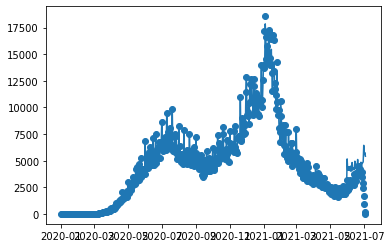

In [ ]:
plt.scatter(casos['FECHA_SINTOMAS'], casos['count'])
plt.plot(np.sort(casos['FECHA_SINTOMAS'], axis=0),prediction)
#plt.plot(np.sort(casos['FECHA_SINTOMAS'], axis=0),polinomial_model)
plt.show()

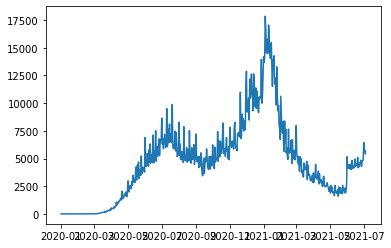

In [ ]:
plt.plot(np.sort(casos['FECHA_SINTOMAS'], axis=0),prediction)
#plt.plot(np.sort(casos['FECHA_SINTOMAS'], axis=0),polinomial_model)
plt.show()

In [ ]:
fechas = pd.Series(pd.date_range('2021-06-29', periods=100).tolist())
predict = pd.DataFrame({'año': fechas.dt.year,
                       'mes': fechas.dt.month,
                       'day': fechas.dt.day})

In [ ]:
con = pd.concat([df_casos[['año','mes', 'day']],predict])
fech = pd.concat([casos['FECHA_SINTOMAS'],fechas])

In [ ]:
prediction = model.predict(con)

ValueError: ignored

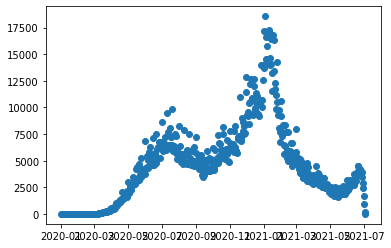

In [ ]:
#plt.scatter(casos['FECHA_SINTOMAS'], casos['count'])
plt.plot(fech,prediction)
plt.show()

#carga de datos desde base de datos


Error conectando a la base de datos:  (2002, "Can't connect to local MySQL server through socket '/var/run/mysqld/mysqld.sock' (2)")
Conectado a base de datos.
